# A/B Testing - Lab

## Introduction

In this lab, you'll go through the process of designing an experiment.

## Objectives
You will be able to:

* Design, structure, and run an A/B test


## The Scenario

You've been tasked with designing an experiment to test whether a new email template will be more effective for your company's marketing team. The current template has a 5% response rate (with standard deviation .0475), which has outperformed numerous other templates in the past. The company is excited to test the new design that was developed internally but nervous about losing sales if it is not to work out. As a result, they are looking to determine how many individuals they will need to serve the new email template in order to detect a 1% performance increase (or decrease).


## Step 1: State the Null Hypothesis, $H_0$

State your null hypothesis here (be sure to make it quantitative as before)

In [ ]:
# h_0 = Your null hypothesis
# h_0 = the response rate for the new email template is 0.05.

## Step 2: State the Alternative Hypothesis, $H_1$

State your alternative hypothesis here (be sure to make it quantitative as before)

In [ ]:
# h_1 = Your alternative hypothesis
# h_1 = the response rate for the new email template is >= 0.06.

## Step 3: Calculate n for standard alpha and power thresholds

Now define what alpha and beta you believe might be appropriate for this scenario.
To start, arbitrarily set alpha to 0.05. From this, calculate the required sample size to detect a .01 response rate difference at a power of .8.

> Note: Be sure to calculate a normalized effect size using Cohen's d from the raw response rate difference.

In [1]:
# Calculate the required sample size
from statsmodels.stats.power import TTestIndPower, TTestPower

power_analysis = TTestIndPower()
power_analysis.solve_power(alpha=.05, effect_size=0.01/0.0475, power=.80, alternative='larger')

279.6667468021841

## Step 4: Plot Power Curves for Alternative Experiment Formulations

While you now know how many observations you need in order to run a t-test for the given formulation above, it is worth exploring what sample sizes would be required for alternative test formulations. For example, how much does the required sample size increase if you put the more stringent criteria of $\alpha=.01$? Or what is the sample size required to detect a .03 response rate difference at the same $\alpha$ and power thresholds? To investigate this, plot power vs sample size curves for alpha values of .01, .05 and .1 along with varying response rate differences of .005, .01, .02 and .03.

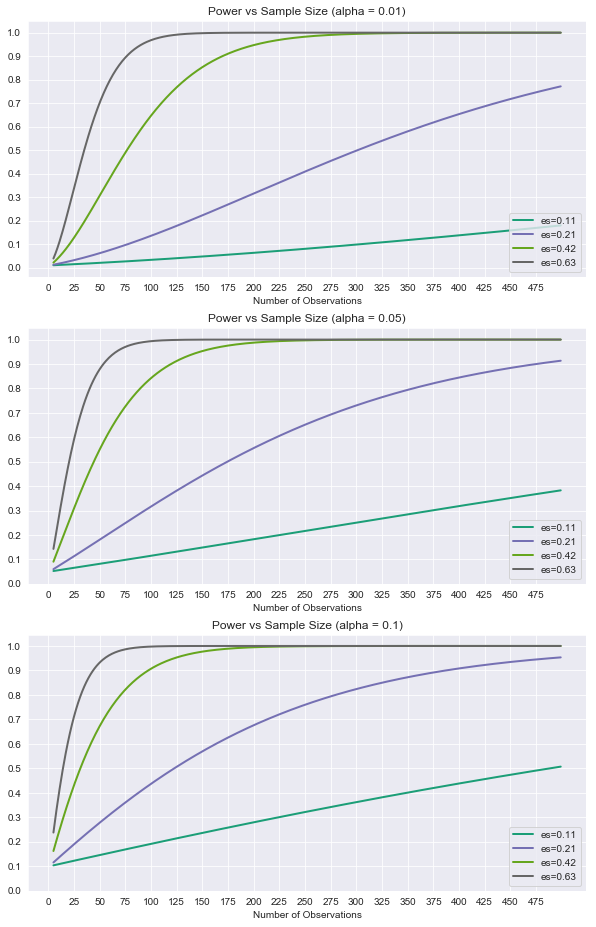

In [4]:
#Your code; plot power curves for the various alpha and effect size combinations
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline


sd = 0.0475
effect_sizes = [mean_diff / sd for mean_diff in [0.005, 0.01, 0.02, 0.03]]
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(10, 16))
for n, alpha in enumerate([0.01, 0.05, 0.1]):
    ax = axes[n]
    power_analysis.plot_power(dep_var="nobs", nobs=np.array(range(5, 500)), effect_size=effect_sizes, alpha=alpha, ax=ax)
    ax.set_title('Power vs Sample Size (alpha = {})'.format(alpha))
    ax.set_xticks(list(range(0, 500, 25)))
    ax.set_yticks(np.linspace(0, 1, 11))

## Step 5: Propose a Final Experimental Design

Finally, now that you've explored some of the various sample sizes required for statistical tests of varying power, effect size and type I errors, propose an experimental design to pitch to your boss and some of the accompanying advantages or disadvantages with it.

### Your answer here

In [ ]:
# A difference in mean response rate of 0.005 is out of the question. 
# The effect size does not reach useful power levels within the range of sample sizes modelled (up to 500).

# A difference in mean response rate of 0.01 is also out of the question.
# The effect size reaches useful power levels at sample sizes beyond what would be reasonable for this experiment.

# Differences in mean response rate of 0.02 and 0.03 would both be appropriate for this experiment.
# In order to reach an ideal power value of 0.08:

# at alpha = 0.01, 
# effect size = 0.42 (mean response rate of 0.02) requires a sample size of 60. This is slightly high.
# effect size = 0.63 (mean response rate of 0.03) requires a sample size of 125. This is very high.

# at alpha = 0.05, 
# effect size = 0.42 (mean response rate of 0.02) requires a sample size of 40. This is realistic.
# effect size = 0.63 (mean response rate of 0.03) requires a sample size of 90. This is moderately high.

# at alpha = 0.01, 
# effect size = 0.42 (mean response rate of 0.02) requires a sample size of 30. This is realistic.
# effect size = 0.63 (mean response rate of 0.03) requires a sample size of 70. This is slightly high.

# Proposal: alpha = 0.05, power = 0.8, sample size = 40, effect size = 0.42. 
# This experiment benfits from being practical and possible, with standard alpha and power values.
# This experiment has the disadvantage of a larger effect size and remains open to false positives.

## Summary

In this lab, you practiced designing an initial experiment and then refined the parameters of the experiment based on an initial sample to determine feasibility.